In [1]:
#Run this first!
import os
import sys
from io import BytesIO
import pandas as pd
import requests
dev = False
#"C:\\","Users","Andrey",\
#                "Documents","GitHub","murraylab_tools"
if(dev):
    devpath = os.path.join("..",\
                    "murraylab_tools","make_moclo_assembly")
    sys.path.append(devpath)
    import make_moclo_assembly as mamo
else:
    import murraylab_tools.make_moclo_assembly as mamo
%matplotlib inline
andreysGoogleDoc='https://docs.google.com/spreadsheets/d/1x7f_2sfOG6KQ7FZO-TPvJlNcVupKLtD9MYq8YUs9TCI/export'
andreydf = pd.read_excel(BytesIO(requests.get(andreysGoogleDoc).content),sheet_name="parts_1")
pcrdf = pd.read_excel(BytesIO(requests.get(andreysGoogleDoc).content),sheet_name="pcr")
mypath = os.path.join("moclo_assembly")

In [2]:
#This cell is for creating your assembly!
#here you can put together the parts located in your source plate.
#interface elements:
#Assembly...[]: the name of all the assemblies you're doing!
#parts list[]: the name of the parts list to use! This picks from which lists
#             exist in the "partslist" folder on the server.
#[Start]: this begins the assembly, locking in the parts list file we're using
#[]list all parts: if checked, all parts will be shown in all columns, as long
#                 as the assembly is valid!
#Dest Well[]: this indicates the first well in the destination plate to use.
#            subsequent assemblies are filled in left to right, top to bottom.
#[Save!]: this saves the assembly, and creates a csv file on the server which
#         can be used for making echo picklists
#
#
#[vector1]...[vector2]: these drop downs will list compatible parts from the
#                       parts list
#[enzyme]: this tells the picklist generation script how to assemble the parts
#         to make assembled sequences. Also it tells the UI whether UNS parts
#         should assemble together.
#[name]: a unique name! This is mostly for you, but make sure each assembly has
#       one!
#[+]: this copies the row and adds it to the bottom.
#[-]: one press clears all the parts, another press deletes the row entirely

mamo.make_assembly_file(mypath,andreydf)

D:\Documents\GitHub\murraylab_tools\examples\moclo_assembly\assemblies\test_assemblies.csv

,vector1,promoter,UTR,CDS,Terminator,newcol1,vector2,enzyme,name,targwell
0,U5A,PlacCIDAR,ntrig3,NaN,T16m,EUX,NaN,BsaI,Lnt5-X,A1
1,U4A,PbadCIDAR,gqisc3,nscaff3,T15m,EU5,NaN,BsaI,Bqinscaff4-5,A2
2,bbLSK-X-1,S22bxT17m1-3,ptmdcast2m3-4,CT19m4-5,NT1DE5-6,Bg16-7,Cg27-X,gibson,rec25,A3
3,bbLSK-X-1,S22bxT17m1-3,ptmdcast2m3-4,NT19m4-5,CT1DE5-6,Bg16-7,Cg27-X,gibson,rec26,A4
4,Cole1HFA,PbadCIDAR,gqisc3,nscaff3,T15m,KanEF,NaN,BsaI,circulartest,A5


FloatProgress(value=0.0, max=1.0)

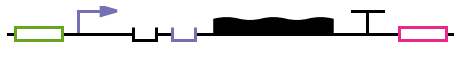

moclo_assembly\DNA\test_assemblies\Lnt5-X.gbk

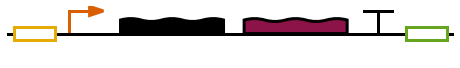

moclo_assembly\DNA\test_assemblies\Bqinscaff4-5.gbk

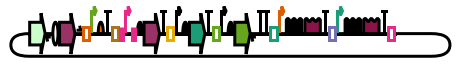

moclo_assembly\DNA\test_assemblies\rec25.gbk

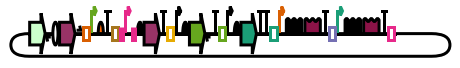

moclo_assembly\DNA\test_assemblies\rec26.gbk

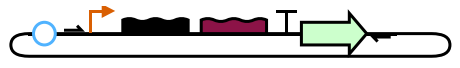

moclo_assembly\DNA\test_assemblies\circulartest.gbk

,well,part,circular,length
0,A1,Lnt5-X,False,438
1,A2,Bqinscaff4-5,False,447
2,A3,rec25,True,11835
3,A4,rec26,True,11835
4,A5,circulartest,True,2089


D:\Documents\GitHub\murraylab_tools\examples\moclo_assembly\DNA\test_assemblies\test_assemblies.csv

D:\Documents\GitHub\murraylab_tools\examples\moclo_assembly\output\output.csv

D:\Documents\GitHub\murraylab_tools\examples\moclo_assembly\output\outputLDV.csv

In [3]:
#run this cell to make an echo picklist!
#you'll get a chance to pick which set of assemblies you want to do, and of
#course the parts list to use.
featuresGoogleDoc='https://docs.google.com/spreadsheets/d/1Kwy3gXb0uuTFQyboBUsc0bdfIZX4zUp_-8igKqSKTKI/export?format=csv'
featuresdf= pd.read_csv(BytesIO(requests.get(featuresGoogleDoc).content))
andreysGoogleDoc='https://docs.google.com/spreadsheets/d/1x7f_2sfOG6KQ7FZO-TPvJlNcVupKLtD9MYq8YUs9TCI/export'
andreydf = pd.read_excel(BytesIO(requests.get(andreysGoogleDoc).content),sheet_name="parts_1")
mamo.process_assembly_file(mypath,printstuff=False,partsdf=andreydf,annotateDF=featuresdf)